In [1]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import numpy as np

In [2]:
r='https://www.worldometers.info/gdp/gdp-by-country/' #url for the given webpage

In [3]:
data=requests.get(r).text# Call the API using the get method and store the
                        # output of the API call in a variable called data.

In [4]:
soup= BeautifulSoup(data, 'html5lib')#parse the document into the BeautifulSoup constructor
                                     #the BeautifulSoup object that is soup here, which represents the document as a nested data structur
#print(soup.prettify())   #prettify() to display the HTML in the nested structure

In [5]:
table = soup.find('table')#find_all() method looks through a tag’s descendants and retrieves all descendants that match your filters.
                          #to find table from the html doc



In [6]:

table_rows=table.find_all('tr') # tr tag is for rows, this code is to find all the rows in the given table
for i,row in enumerate(table_rows): #iterate through each row in the table
    cells=row.find_all('td') #to find all the columns and store it in variable called cells
    #for j,cell in enumerate(cells): #iterate through each column
        #print('colunm',j,"cell",cell) #and print each column(cell) and its index(j)

In [7]:
Country=[] #create an empty list called country to store the name of each country
GDP=[]#create an empty list called GDP to store the GDP of each country
Population=[]#create an empty list called Population to store the population of each country
GDPpercapita=[]#create an empty list called GDPpercapita to store the GDP per capita of each country
ShareofworldGDP=[]#create an empty list called ShareofworldGDP to store how much each country's GDP account for the total GDP
table_rows=table.find_all('tr')# tr tag is for rows, this code is to find all the rows in the given table
for i,row in enumerate(table_rows):#iterate through each row in the table
    countries=row.find_all('td')[1:2]# to access index 1 of the columns which stores countries names
    country = [elem.get_text() for elem in countries]#You can't use get_text() on the list itself, but you can on the individual elements.
    country=str(country)[1:-1].replace("'", "")#to replace the '' from the country names & [1:-1] will help to remove square brackets from the list
    g=row.find_all('td')[2:3]# to access index 2 of the columns
    gdp =[elem.get_text() for elem in g]
    gdp=str(gdp)[1:-1].replace(',', '').replace("$", "").replace("'", "")#to replace the ,$'' signs from each GDP value
    p=row.find_all('td')[4:5]# to access index 4 of the columns
    pop = [elem.get_text() for elem in p]
    pop=str(pop)[1:-1].replace("'", "")#to replace the '' from the country names
    c=row.find_all('td')[5:6]# to access index 5 of the columns
    gdpc = [elem.get_text() for elem in c]
    gdpc=str(gdpc)[1:-1].replace("'", "").replace(",", "")#to replace the '', from the country names
    s=row.find_all('td')[6:7]# to access index 6 of the columns
    sowg = [elem.get_text() for elem in s]
    sowg=str(sowg)[1:-1].replace(',', '').replace("$", "").replace("'", "")#to replace the '',$ from the country names
    Country.append(country)#append counry to the empty list Country
    GDP.append(gdp)#append gdp to the empty list GDP
    Population.append(pop)#append pop to the empty list Population
    GDPpercapita.append(gdpc)#append gdpc to the empty list GDPpercapita
    ShareofworldGDP.append(sowg)#append sowg to the empty list ShareofworldGDP
    
    print(sowg) 
    


59939
8612
38214
44680
1980
39532
39827
9881
32038
44841
10846
29958
53831
28175
9224
3837
10498
48796
20747
80296
14508
54075
13871
43325
6579
5628
47261
75428
40325
1969
42852
6120
46733
69727
57545
56746
10118
6429
2982
1467
15001
45778
1564
2441
2366
21316
20291
10781
6723
43415
19214
5114
4048
61264
9009
14364
4096
29616
2879
2521
3083
6214
8541
17551
4135
757
1578
7223
4471
15170
1256
105280
15166
2026
8197
11573
16341
13200
5762
7857
975
80890
1554
23488
16709
4692
4139
4095
3494
5776
5791
6587
462
3351
1529
23715
1422
1123
15613
20170
631
1535
900
3883
73233
2437
1384
15952
18695
1548
1366
2434
538
5387
7894
2424
828
3762
7271
5061
3054
2164
10491
5516
4521
441
28585
642
9741
31858
28572
3918
450
3672
5418
868
657
827
762
1703
766
2002
376
1222
805
357
35665
5768
1173
9802
7720
618
16328
3942
504
4671
699
293
39128
5251
2377
25630
1233
3391
424
4957
3298
9602
48495
28164
15825
15536
673
737
2049
10164
1312
19061
3022
4305
7150
11399
6951
4193
1896
631
16275
3517
1626
3494


In [8]:

import pandas as pd
df = pd.DataFrame() #create empty dataframe called df
df['Country']=Country#create column called Country in the dataframe which stores the values of list Country
df['GDP']=GDP#create column called GDPin the dataframe which stores the values of list GDP
df[' Population']= Population#create column called Population in the dataframe which stores the values of list Population
df['GDPpercapita']=GDPpercapita#create column called GDPpercapita in the dataframe which stores the values of list GDPpercapita
df['ShareofworldGDP']=ShareofworldGDP#create column called ShareofworldGDP in the dataframe which stores the values of list ShareofworldGDP
df.drop(labels=0, axis=0, inplace=True)



In [9]:
df.to_csv('/Users/abhisheksinha/Desktop/GDP.csv') #store the dataframe as GDP.csv file at the given location in brackets

In [10]:
data=pd.read_csv('/Users/abhisheksinha/Desktop/GDP.csv')
data.head()

,Unnamed: 0,Country,GDP,Population,GDPpercapita,ShareofworldGDP
0,1,United States,19485394000000,2.27%,325084756,59939
1,2,China,12237700479375,6.90%,1421021791,8612
2,3,Japan,4872415104315,1.71%,127502725,38214
3,4,Germany,3693204332230,2.22%,82658409,44680
4,5,India,2650725335364,6.68%,1338676785,1980


In [11]:
data.dtypes

Unnamed: 0          int64
Country            object
GDP                 int64
 Population        object
GDPpercapita        int64
ShareofworldGDP     int64
dtype: object

In [12]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [13]:
data.head()

,Country,GDP,Population,GDPpercapita,ShareofworldGDP
0,United States,19485394000000,2.27%,325084756,59939
1,China,12237700479375,6.90%,1421021791,8612
2,Japan,4872415104315,1.71%,127502725,38214
3,Germany,3693204332230,2.22%,82658409,44680
4,India,2650725335364,6.68%,1338676785,1980


In [14]:
data.isna().sum()

Country            0
GDP                0
 Population        0
GDPpercapita       0
ShareofworldGDP    0
dtype: int64

In [15]:
data.describe()

,GDP,GDPpercapita,ShareofworldGDP
count,1.900000e+02,1.900000e+02,190.000000
mean,4.188098e+11,3.902765e+07,14303.668421
std,1.755006e+12,1.461575e+08,19155.257580
min,3.973132e+07,1.137000e+04,293.000000
25%,8.121906e+09,1.858883e+06,2008.000000
50%,3.639298e+10,7.971161e+06,5765.000000
75%,2.117603e+11,2.778428e+07,16617.000000
max,1.948539e+13,1.421022e+09,105280.000000


In [24]:
#Categorizing GDP variable for further analysis

In [20]:
bins=np.linspace(min(data['GDP']), max(data['GDP']), 4)
bins

array([3.97313170e+07, 6.49515782e+12, 1.29902759e+13, 1.94853940e+13])

In [22]:
label=['Low', 'Medium', 'High']
GDP_binned=pd.cut(data['GDP'], bins, labels=label, include_lowest=True)


In [23]:
data['GDP_cat']=GDP_binned
data.head()

,Country,GDP,Population,GDPpercapita,ShareofworldGDP,GDP_cat
0,United States,19485394000000,2.27%,325084756,59939,High
1,China,12237700479375,6.90%,1421021791,8612,Medium
2,Japan,4872415104315,1.71%,127502725,38214,Low
3,Germany,3693204332230,2.22%,82658409,44680,Low
4,India,2650725335364,6.68%,1338676785,1980,Low


In [25]:
data['GDP_cat'].unique()

[High, Medium, Low]
Categories (3, object): [Low < Medium < High]

In [26]:
data['GDP_cat'].value_counts()

Low       188
High        1
Medium      1
Name: GDP_cat, dtype: int64

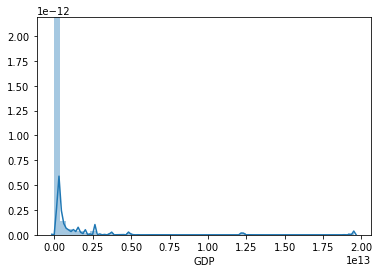

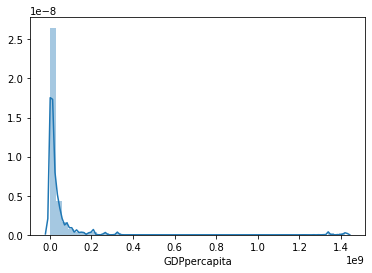

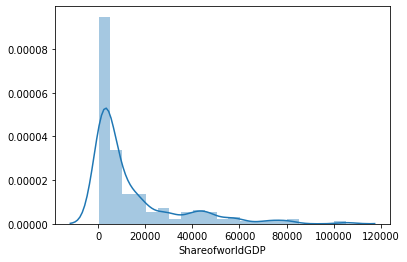

In [18]:
#creating distribution plot for the numerical variables
import matplotlib.pyplot as plt
import seaborn as sns
features = data[['GDP', 'GDPpercapita','ShareofworldGDP']]#creating new dataframe with the selected variables from the original dataframe 
for i,index in enumerate(features.columns):
    plt.figure(i)#Create a new figure, or activate an existing figure
    sns.distplot(features[index])